# Exact Algorithms

The obvious advantage of such algorithms is the guarantee that the output is optimal. However, with the TSP being classified NP-hard, it seems that all exact algorithms must have superpolynomial time complexity. This is certainly true of the algorithms demonstrated below. This notebook may take a couple of minutes to execute all cells.

In [2]:
from Req import brute_tour, held_karp, gen_ran, Hamiltonian
from GraphTheory.tspt import tspfull
from time import time
import matplotlib.pyplot as plt

We start by creating a list of randomly generated maps to use in our investigation.

In [3]:
maps = [gen_ran(i) for i in range(3, 20)]

## Brute Force Search

We investigate how fast the CPU time of finding a brute force optimal solution increases with the size of the problem. With factorial time complexity, things rapidly get out of hand.

Time elapsed: 0.0 seconds


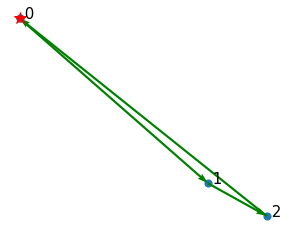

Time elapsed: 0.0 seconds


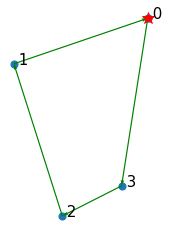

Time elapsed: 0.0 seconds


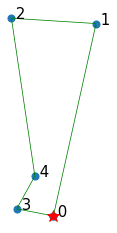

Time elapsed: 0.001 seconds


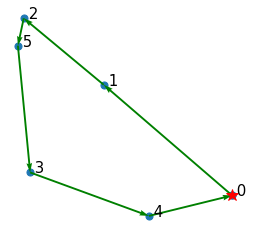

Time elapsed: 0.011 seconds


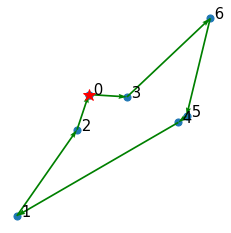

Time elapsed: 0.107 seconds


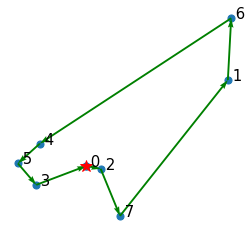

Time elapsed: 0.714 seconds


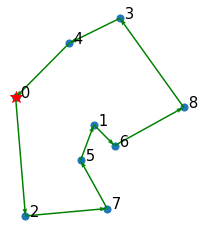

Time elapsed: 6.121 seconds


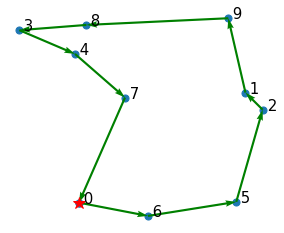

Time elapsed: 67.573 seconds


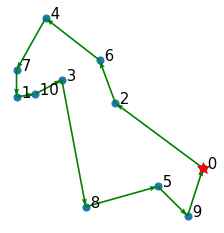

In [4]:
bf_times = []
for map in maps[:9]:
    t0 = time()
    dummy = brute_tour(map)
    t1 = time()
    t = t1 - t0
    bf_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## Dynamic Programming

The Held-Karp algorithm utilises memoisation to rule out sub-optimal tours, making it more efficient than brute force. This leads to an improved but still terrible time complexity of $O(n^{2}2^{n})$.

Time elapsed: 0.0 seconds


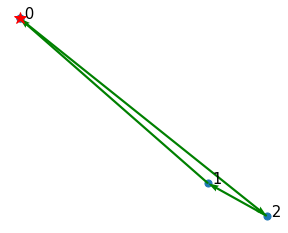

Time elapsed: 0.0 seconds


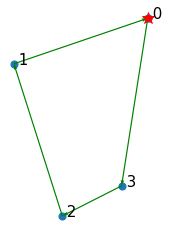

Time elapsed: 0.0 seconds


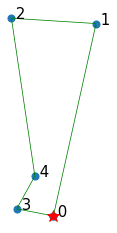

Time elapsed: 0.001 seconds


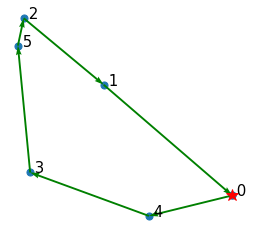

Time elapsed: 0.002 seconds


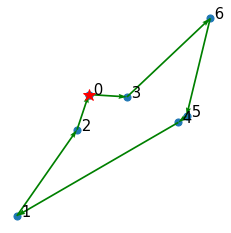

Time elapsed: 0.011 seconds


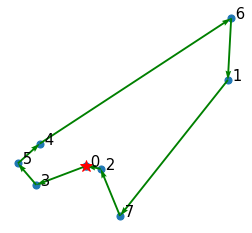

Time elapsed: 0.022 seconds


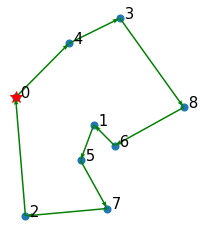

Time elapsed: 0.075 seconds


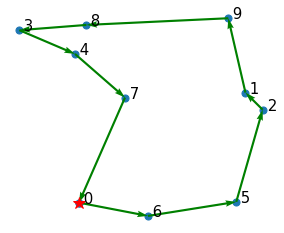

Time elapsed: 0.211 seconds


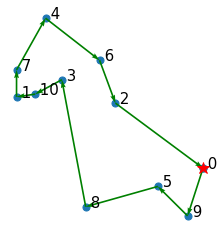

Time elapsed: 0.472 seconds


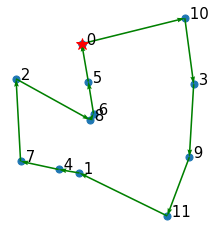

Time elapsed: 1.121 seconds


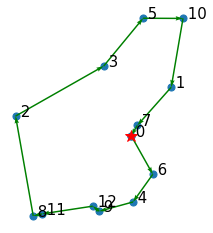

Time elapsed: 2.915 seconds


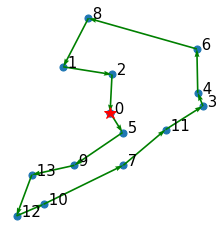

Time elapsed: 7.337 seconds


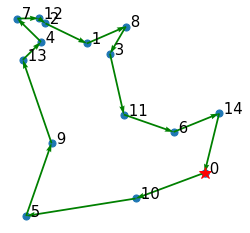

Time elapsed: 17.755 seconds


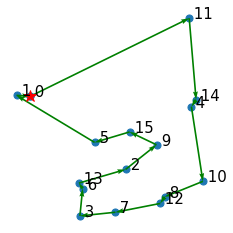

Time elapsed: 40.428 seconds


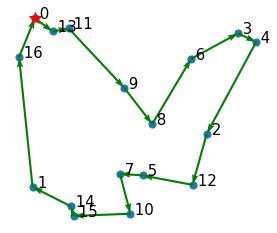

Time elapsed: 95.889 seconds


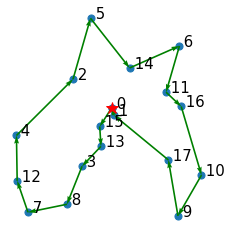

Time elapsed: 220.37 seconds


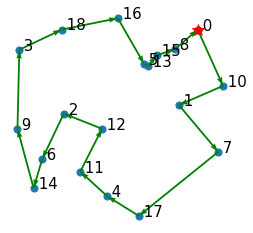

In [22]:
hk_times = []
for map in maps[:17]:
    t0 = time()
    dummy = held_karp(map)
    t1 = time()
    t = t1 - t0
    hk_times.append(t)
    print(f"Time elapsed: {round(t, 3)} seconds")
    dummy.show2d()

## A Comparison

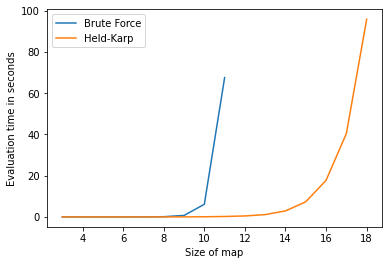

In [29]:
plt.plot([i for i in range(3, 12)], bf_times, label='Brute Force')
plt.plot([i for i in range(3, 19)], hk_times[:16], label='Held-Karp')
plt.legend()
plt.xlabel("Size of map")
plt.ylabel("Evaluation time in seconds")
plt.show()

In [20]:
lis = [str((a, b)) for a,b in zip([i for i in range(3,12)], bf_times)]
''.join(lis)

'(3, 5.054473876953125e-05)(4, 8.177757263183594e-05)(5, 0.00018668174743652344)(6, 0.0010192394256591797)(7, 0.010955095291137695)(8, 0.10696029663085938)(9, 0.7139444351196289)(10, 6.121083974838257)(11, 67.57344341278076)'

In [30]:
lis = [str((a, b)) for a,b in zip([i for i in range(3,19)], hk_times[:16])]
''.join(lis)

'(3, 0.00013208389282226562)(4, 0.00011229515075683594)(5, 0.000453948974609375)(6, 0.0011713504791259766)(7, 0.002231121063232422)(8, 0.011429548263549805)(9, 0.022317171096801758)(10, 0.07451605796813965)(11, 0.21143341064453125)(12, 0.47224998474121094)(13, 1.1208689212799072)(14, 2.9148173332214355)(15, 7.337033271789551)(16, 17.75480008125305)(17, 40.42776155471802)(18, 95.88948893547058)'